In the previous notebook you simulated the Dubin's Car model by choosing random steering angles. Typically there is a target location the vehicle is progressing to, thus choosing control inputs that which move closer to the target would be ideal.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = 12, 12

Dubin's car simulation from the previous notebook.

In [4]:
def simulate(state, angle, v, dt):
    x = state[0]
    y = state[1]
    theta = state[2]    
    
    nx = x + v*np.cos(theta)*dt
    ny = y + v*np.sin(theta)*dt
    ntheta = theta + v*np.tan(angle)*dt
    
    return [nx, ny, ntheta]

Implement the `steer` function which returns controls inputs that progress `x1` to `x2`. You should return the steering angle and velocity. Remember constraints!

In [5]:
# limit the steering angle range
MAX_STEERING_ANGLE = np.deg2rad(30)
# km/h
MAX_VELOCITY = 1

def steer(x1, x2):
    theta = x1[2]
    
    # assumes theta is 0
    angle = np.arctan2(x2[1] - x1[1], x2[0] - x1[0]) - theta
    angle = np.clip(angle, -MAX_STEERING_ANGLE, MAX_STEERING_ANGLE)
    
    v = np.linalg.norm(np.array(x1[:2]) - np.array(x2[:2]))
    v = np.clip(v, 0, MAX_VELOCITY)
                
    return [angle, v]

Initially, we place the car at the center of the coordinate system (0, 0) and give heading of $0$ which is facing in the positive direction along the $x$ axis.

In [6]:
# feel free to play around with these
dt = 0.1
total_time = 10

# initial state
start = [0, 0, 0]

# the goal location, feel free to change this ...
goal = [10, -15, 0]
states = [start]

for _ in np.arange(0, total_time, dt):
    current_state = states[-1]
    angle, velocity = steer(current_state, goal)
    state = simulate(current_state, angle, velocity, dt)
    states.append(state)

states = np.array(states)

Now let's visualize the path! It should be a smooth path from the start location to the goal location.

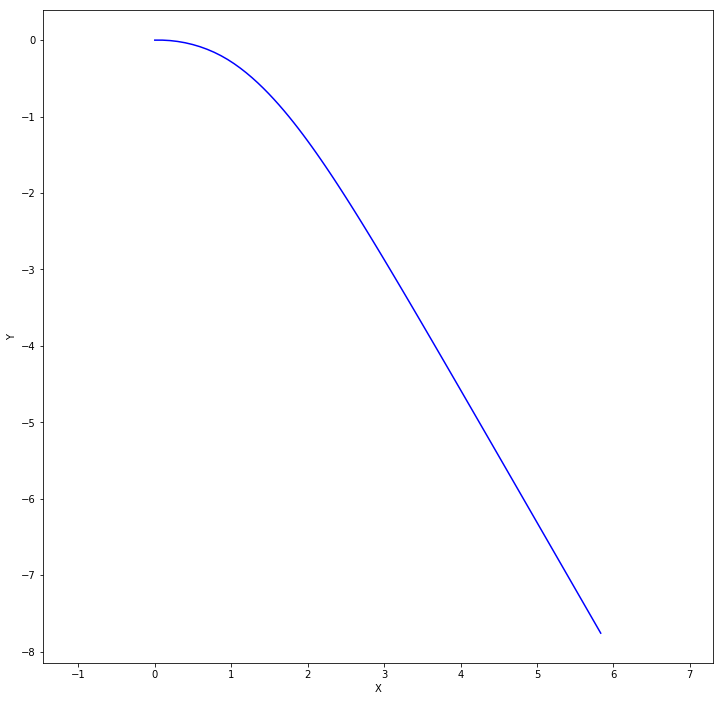

In [7]:
plt.plot(states[:, 0], states[:, 1], color='blue')
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()